Work in Progress. Will be updated by Friday. Zheyu Ni

This file cleans the Airbnb data. 
1. deleted $ sign and comma in price.
2. visualize price distribution base on different features
3. Price range (0, 800) covers 95\% of the listings
4. create a dummy for the listing without review data
5. check how many listings have hotel/motel in name and agree with their room_type

The remaing data file contains \% of the raw data

In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('../listings_mar7_2023.csv')


In [41]:
#data cleaning. Price data has $ sign. The following code extracts the number
df['price'] = df['price'].replace({r'\$':''},regex = True).replace({r',':''},regex = True).astype('float')
df.price

0         399.0
1          46.0
2         408.0
3          80.0
4        2138.0
          ...  
42446      40.0
42447      48.0
42448      46.0
42449      68.0
42450      48.0
Name: price, Length: 42451, dtype: float64

In [ ]:
print(df['room_type'].value_counts())

In [52]:
df_practice = df.copy()
df_practice['name'] = df_practice['name'].str.lower()
df_practice.loc[df_practice['name'].str.contains('motel',regex=False) == True, 'room_type'] = 'Hotel room'
df_practice.loc[df_practice['name'].str.contains('hotel',regex=False) == True, 'room_type'] = 'Hotel room'
df['room_type'] = df_practice['room_type']
#df_practice.dropna()

In [ ]:
print(df['room_type'].value_counts())

In [65]:
df_practice.loc[df_practice['name'].str.contains('hotel',regex=False) == True].head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
207,751616304749776335,https://www.airbnb.com/rooms/751616304749776335,20230307175359,2023-03-08,city scrape,cozy hotel style unit near beverly hills,LA Suites is nestled in the heart of Beverly H...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,484477694,...,NaN,NaN,NaN,NaN,t,54,54,0,0,NaN
209,46432534,https://www.airbnb.com/rooms/46432534,20230307175359,2023-03-08,city scrape,brand new hotel by studio city! comfy 2 queen bed,A brand new upscale boutique hotel located nea...,NaN,https://a0.muscache.com/pictures/2032181b-6378...,67469870,...,4.89,4.78,4.52,NaN,f,13,0,13,0,0.96


In [42]:
df.head(2)

#columns that are interesting:
# latitude
# longitude
# room_type
# property_type
# accommodates
# bathrooms_text
# number_of_reviews
# first_review
# last_reviews
# reviews_per_month


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [43]:
#column_names =[df.columns,df.dtypes]
#list(column_names)

df.price[0:10]

0     399.0
1      46.0
2     408.0
3      80.0
4    2138.0
5      55.0
6      60.0
7      55.0
8     129.0
9     107.0
Name: price, dtype: float64

In [ ]:
df_priv = df[df['room_type']=='Private room'].copy()
df_homeapt = df[df['room_type']=='Entire home/apt'].copy()
df_share = df[df['room_type']=='Shared room'].copy()
df_hotel = df[df['room_type']=='Hotel room'].copy()

Text(0, 0.5, 'Frequency')

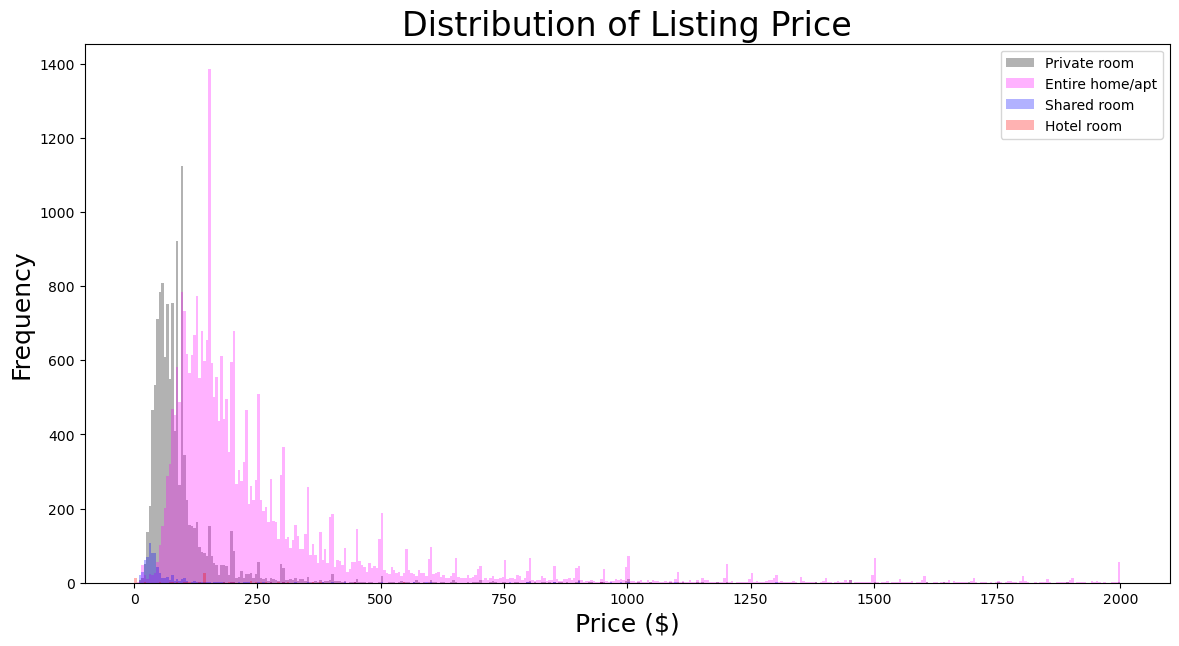

In [47]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)